# LIF Population Statistics Visualization

## Tier 1: Mean and Variance of Connectivities

 - [x] Load data -> dataframe.
 - [x] Arp through weight variances, plot {mean vs. synch}.
 - [x] Arp through means, plot {variance vs. synch}.
 - [x] Try making a 3D surface plot (plotly).
 - [ ] Iterate data acquisition -> better plots.
 

In [59]:
### Import Box ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:>

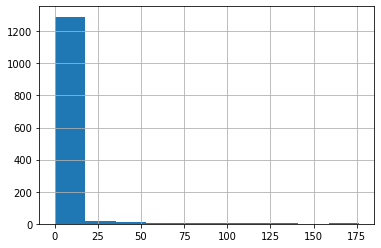

In [60]:
# Loading Data
df = pd.read_csv('data_2.csv', names =['mean', 'std', 'max_spikes', 'synch', 'synch_std'])
df['max_spikes'].hist()

In [83]:
stds = df['std'].unique()
means = df['mean'].unique()
stds = stds[0:3]
df

,mean,std,max_spikes,synch,synch_std
0,-0.933333,0.333333,6.400000,0.043853,0.001400
1,-0.933333,0.666667,8.000000,0.043071,0.001422
2,-0.933333,1.000000,9.800000,0.044778,0.004436
3,-0.866667,0.333333,6.266667,0.044358,0.001941
4,-0.866667,0.666667,9.933333,0.044694,0.006480
...,...,...,...,...,...
1345,0.000000,0.000000,0.000000,0.000000,0.000000
1346,0.000000,0.000000,0.000000,0.000000,0.000000
1347,0.000000,0.000000,0.000000,0.000000,0.000000
1348,0.000000,0.000000,0.000000,0.000000,0.000000


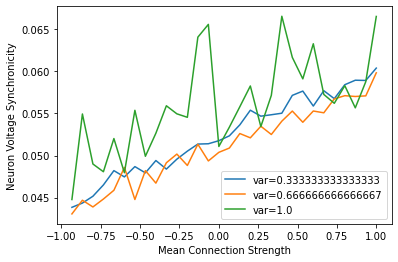

In [78]:
# Arp through variances, plot {mean vs. synch}:

for std in stds:
    x = df[df['std'] == std]['mean'].to_numpy()
    y = df[df['std'] == std]['synch'].to_numpy()
    plt.plot(x,y, label='var={}'.format(std))
    plt.xlabel('Mean Connection Strength')
    plt.ylabel('Neuron Voltage Synchronicity')
    # plt.title('Connection Strength vs. Synchronicity (weight variannce = {})'.format(std))
plt.legend()
plt.show()

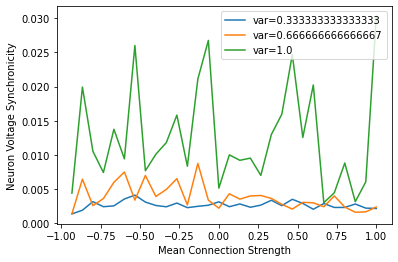

In [85]:
# Arp through variances, plot {mean vs. synch}:

for std in stds:
    x = df[df['std'] == std]['mean'].to_numpy()
    y = df[df['std'] == std]['synch_std'].to_numpy()
    plt.plot(x,y, label='var={}'.format(std))
    plt.xlabel('Mean Connection Strength')
    plt.ylabel('Neuron Voltage Synchronicity')
    # plt.title('Connection Strength vs. Synchronicity (weight variannce = {})'.format(std))
plt.legend()
plt.show()

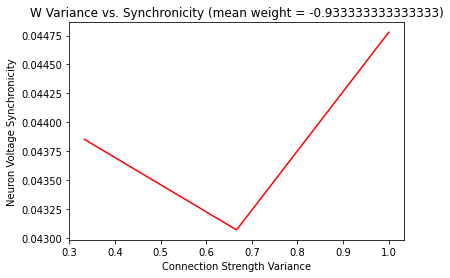

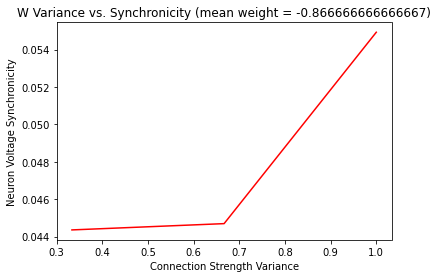

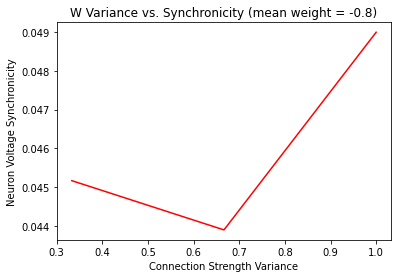

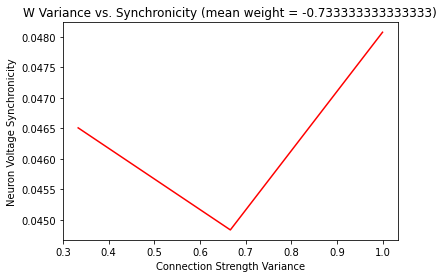

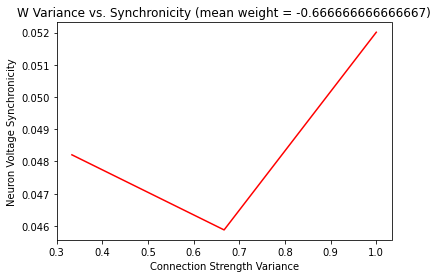

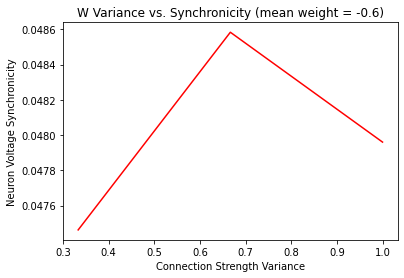

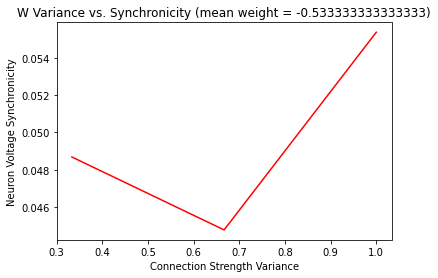

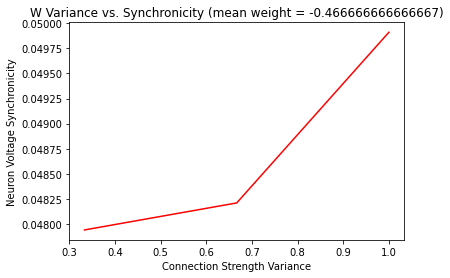

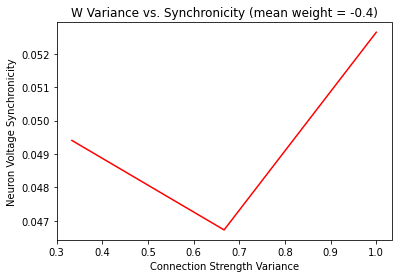

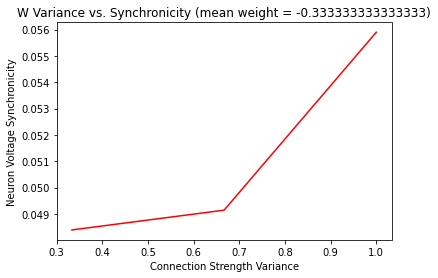

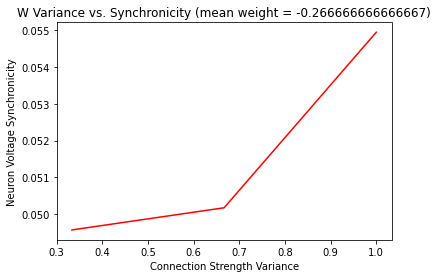

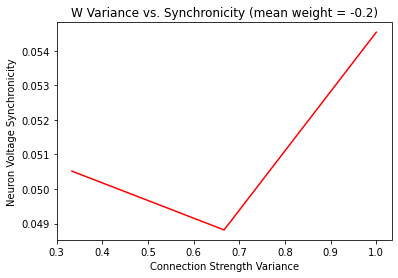

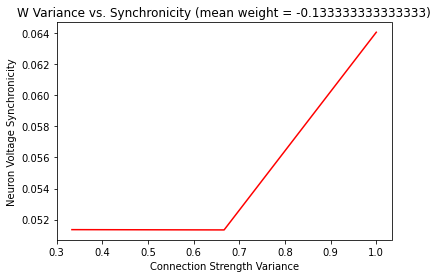

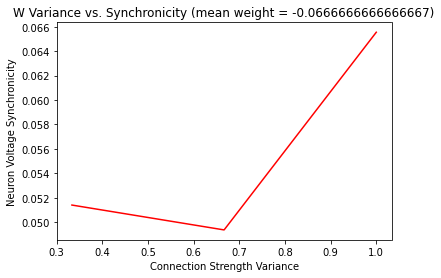

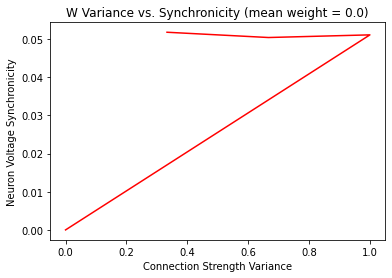

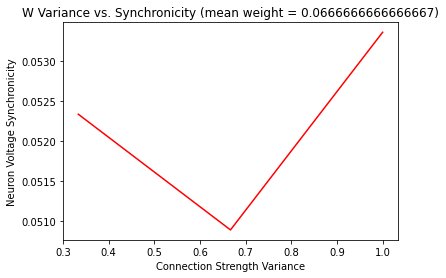

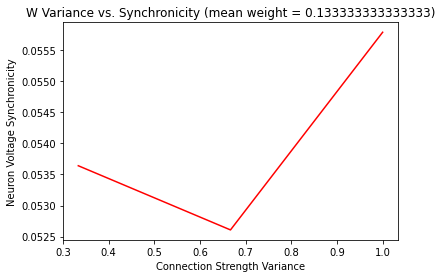

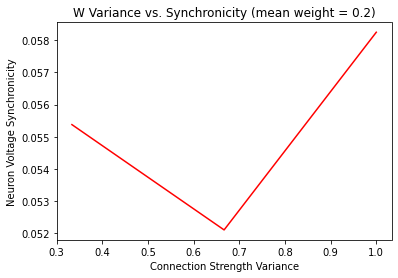

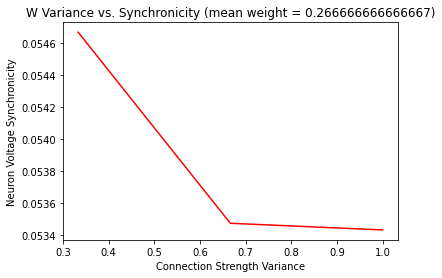

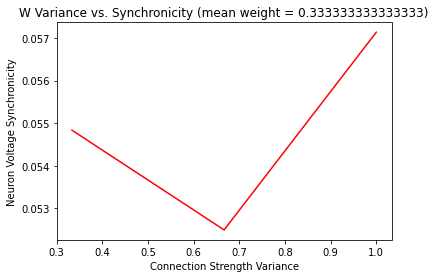

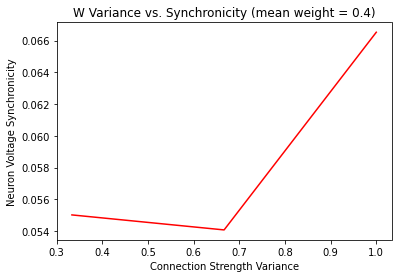

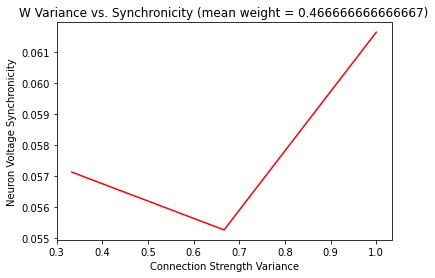

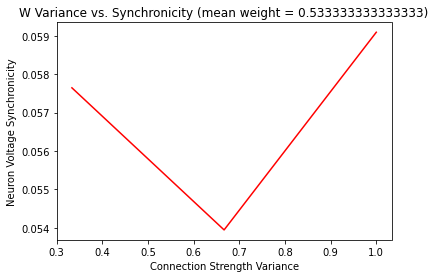

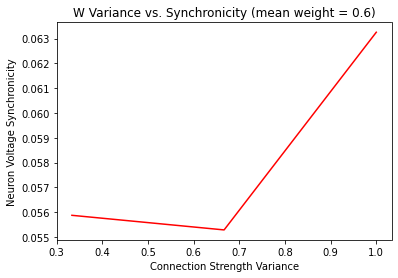

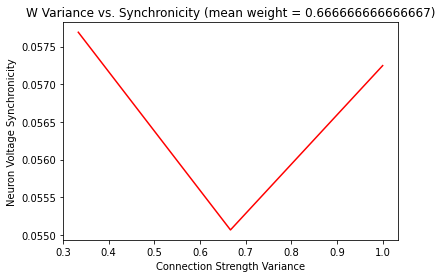

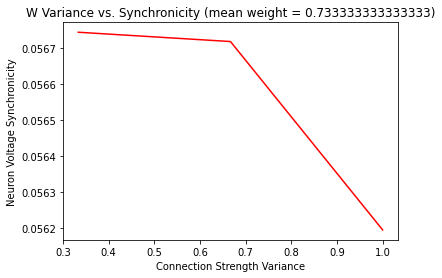

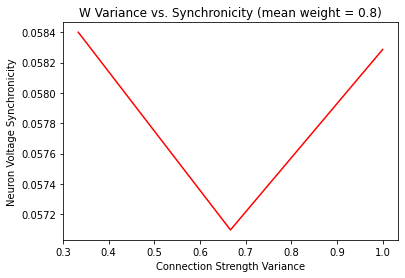

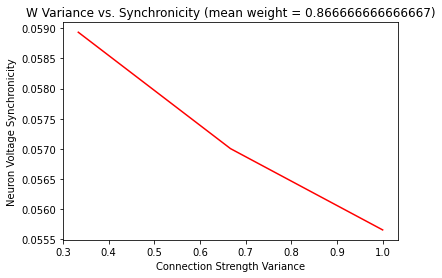

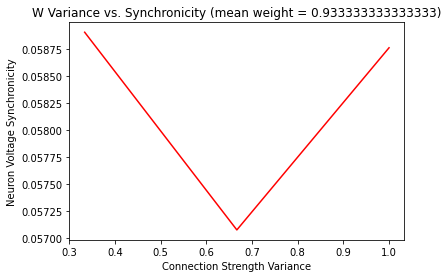

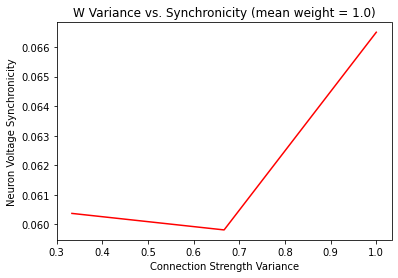

In [63]:
# Arp through means, plot {variance vs. synch}:

for mean in means:
    x = df[df['mean'] == mean]['std'].to_numpy()
    y = df[df['mean'] == mean]['synch'].to_numpy()
    plt.plot(x,y,c='r')
    plt.xlabel('Connection Strength Variance')
    plt.ylabel('Neuron Voltage Synchronicity')
    
    plt.title('W Variance vs. Synchronicity (mean weight = {})'.format(mean))
    plt.show()